**[LSE-01]** 모듈을 임포트 한다.

In [31]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

**[LSE-02]** Placeholder x를 정의한다.

In [7]:
x = tf.placeholder(tf.float32, [None, 5])

**[LSE-03]** Variable w를 정의한다.

In [11]:
w = tf.Variable(tf.zeros([5, 1]))

**[LSE-04]** 계산식 y를 정의한다.

In [12]:
y = tf.matmul(x, w)

**[LSE-05]** Placeholder t를 정의한다.

In [13]:
t = tf.placeholder(tf.float32, [None, 1])

**[LSE-06]** 오차 함수 loss를 정의한다.

In [15]:
loss = tf.reduce_sum(tf.square(y-t))

**[LSE-07]** 트레이닝 알고리즘 train_step을 정의한다.

In [16]:
train_step = tf.train.AdamOptimizer().minimize(loss)

In [37]:
help(tf.train.AdamOptimizer())

Help on AdamOptimizer in module tensorflow.python.training.adam object:

class AdamOptimizer(tensorflow.python.training.optimizer.Optimizer)
 |  Optimizer that implements the Adam algorithm.
 |  
 |  See [Kingma et al., 2014](http://arxiv.org/abs/1412.6980)
 |  ([pdf](http://arxiv.org/pdf/1412.6980.pdf)).
 |  
 |  Method resolution order:
 |      AdamOptimizer
 |      tensorflow.python.training.optimizer.Optimizer
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, learning_rate=0.001, beta1=0.9, beta2=0.999, epsilon=1e-08, use_locking=False, name='Adam')
 |      Construct a new Adam optimizer.
 |      
 |      Initialization:
 |      
 |      ```
 |      m_0 <- 0 (Initialize initial 1st moment vector)
 |      v_0 <- 0 (Initialize initial 2nd moment vector)
 |      t <- 0 (Initialize timestep)
 |      ```
 |      
 |      The update rule for `variable` with gradient `g` uses an optimization
 |      described at the end of section2 of the paper:
 |      
 |   

**[LSE-08]** 세션을 준비하고 Variable을 초기화한다.

In [17]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

**[LSE-09]** 트레이닝 세트 데이터를 준비한다.

In [20]:
train_t = np.array([5.2, 5.7, 8.6, 14.9, 18.2, 20.4, 25.5, 26.4, 22.8, 17.5, 11.1, 6.6])
train_t = train_t.reshape([12, 1])

train_x = np.zeros([12, 5])
for row, month in enumerate(range(1, 13)):
    for col, n in enumerate(range(0, 5)):
        train_x[row][col] = month**n

**[LSE-10]** 경사 하강법을 이용한 파라미터 최적화를 100000회 반복한다.

In [38]:
i = 0
for _ in range(100000):
    i += 1
    sess.run(train_step, feed_dict={x: train_x, t: train_t})
    if i % 10000 == 0:
        loss_val = sess.run(loss, feed_dict={x: train_x, t: train_t})
        print('Step: %d, Loss: %f' % (i, loss_val))

Step: 10000, Loss: 19.512671
Step: 20000, Loss: 19.512671
Step: 30000, Loss: 19.512671
Step: 40000, Loss: 19.512671
Step: 50000, Loss: 19.512671
Step: 60000, Loss: 19.512671
Step: 70000, Loss: 19.512671
Step: 80000, Loss: 19.512671
Step: 90000, Loss: 19.512671
Step: 100000, Loss: 19.512671


**[LSE-11]** 다시 100000회 반복한다.

In [23]:
for _ in range(100000):
    i += 1
    sess.run(train_step, feed_dict={x: train_x, t: train_t})
    if i % 10000 ==0 :
        loss_val = sess.run(loss, feed_dict={x: train_x, t: train_t})
        print('Step: %d, Loss: %f' % (i, loss_val))

Step: 110000, Loss: 19.973928
Step: 120000, Loss: 19.552513
Step: 130000, Loss: 18.860426
Step: 140000, Loss: 18.366467
Step: 150000, Loss: 17.948450
Step: 160000, Loss: 18.789228
Step: 170000, Loss: 17.088497
Step: 180000, Loss: 16.720734
Step: 190000, Loss: 16.423943
Step: 200000, Loss: 19.512671


**[LSE-12]** 트레이닝 후 파라미터 값을 확인한다.

In [24]:
w_val = sess.run(w)
print (w_val)

[[ 6.3395257 ]
 [-4.2865386 ]
 [ 2.58276868]
 [-0.28977084]
 [ 0.00858687]]


**[LSE-13]** 트레이닝 후 파라미터를 이용해 예측기온을 계산하는 함수를 정의한다.

In [25]:
def predict(x):
    result = 0.0
    for n in range(0, 5):
        result += w_val[n][0] * x **n
    return result

**[LSE-14]** 예측기온 그래프를 그린다.

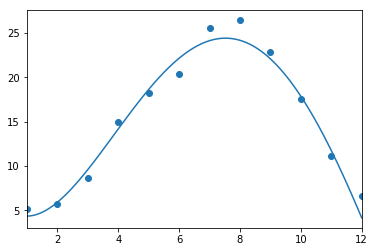

In [32]:
fig = plt.figure()
subplot = fig.add_subplot(1,1,1)
subplot.set_xlim(1,12)
subplot.scatter(range(1,13), train_t)
linex = np.linspace(1,12,100)
liney = predict(linex)
subplot.plot(linex, liney)